In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')

from sim.LoadBalancer import LoadBalancer
from sim.Source import AutoRegressiveArrivalSchedule, Source, ExponentialSource
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancer
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from optServers import getOptServer


## Arrival process
use number of arrivals and number of cancelled to define autoregressive process

In [ ]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [ ]:
X0 = np.array([18000, 0])
X = X0
A = np.array([1,0.05])
arrivalProcess = lambda X: X.T @ A 

arr = []
canc = []
for i in range(0,100):
    arrs  = arrivalProcess(X) + random.normalvariate(0,100)
    arr.append(arrs)
    cancelled = max(arrs-18000,0)
    canc.append(cancelled)
    X = np.array([arrs, cancelled])

plt.plot(arr)
plt.figure()
plt.plot(canc)


### Test the process

In [ ]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [14]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

stopTime = 4*7*24*60*60
env = Environment(stopTime=stopTime)

#model = LinearRegression()
#model = DecisionTreeRegressor()
#model  = MLPRegressor(hidden_layer_sizes=[10], activation='tanh')
model  = RandomForestRegressor(n_estimators=10)
eta = lambda t: sigmoid(2-0.01*t)
#eta = 0.4
#sigmoid(2/(0.1*t+2)-0.5)
periodLength = 1*60*60 #half an hour per period -> schedule repeated two times in 12 hours
loadBalancer = GreedyEpsilonLoadBalancer(nServers=10, environment=env, model = model, eta=eta, nServerRange=[1,30], usePartialFit=False, periodLength=periodLength)

requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalsPerSecond = 10 #starting value
source = ExponentialSource(arrivalsPerSecond, requestTypes, loadBalancer, env)

schedule = np.array([arrivalsPerSecond]) #12 periods
arrivalSchedule = AutoRegressiveArrivalSchedule(periodLength,arrivalSchedule=schedule, environment=env, loadBalancer=loadBalancer, source=source, maxArrivals=20, A=[0,1,0,0,0,0.3,0])
env.run(debug=False)

36231 2248 10 10751.0
1
npa 10.09394224223072
36127 4783 1 -12003.0
nan
(1, 8) (1, 1)
12
npa 10.084446717056101


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


36366 1572 12 17046.0
0.48
(2, 8) (2, 1)
Max reward for -6193.2 7
7
npa 10.087378595051515


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36444 2343 7 10914.0
0.8112048676270618
(3, 8) (3, 1)
8
npa 10.104479949483535


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36640 2182 8 12420.0
0.5868429001902966
(4, 8) (4, 1)
Max reward for 4340.1 5
5
npa 10.070464144338073


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35995 2521 5 9285.0
0.6415431821862497
(5, 8) (5, 1)
21
npa 9.937803867486409


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35776 0.0 21 29476.0
0.9268673850867033
(6, 8) (6, 1)
17
npa 10.008066400598407


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36052 1 17 30942.0
0.9181011944446454
(7, 8) (7, 1)
10
npa 9.984130192479675


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35879 2303 10 9849.0
0.8595643345825543
(8, 8) (8, 1)
24
npa 10.034622394495686


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36331 1 24 29121.0
0.9295469410673661
(9, 8) (9, 1)
28
npa 10.217685072792468


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36716 0.0 28 28316.0
0.9482439936226187
(10, 8) (10, 1)
Max reward for 25811.1 17
17
npa 10.275954672095969


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36831 4 17 31691.0
0.9497171555589933
(11, 8) (11, 1)
6
npa 10.30696202066659


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36528 3358 6 1148.0
0.9306319559679201
(12, 8) (12, 1)
2
npa 9.982610939829414


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36033 4530 2 -9867.0
0.9310341496504672
(13, 8) (13, 1)
14
npa 9.90254381769455


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35653 646 14 24993.0
0.9538704377916416
(14, 8) (14, 1)
24
npa 9.825525190363674


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35468 0.0 24 28268.0
0.9583531729286022
(15, 8) (15, 1)
8
npa 9.757128673575648


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34832 2338 8 9052.0
0.9611917365798417
(16, 8) (16, 1)
24
npa 9.762084948044777


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35430 10 24 28130.0
0.9693101094961901
(17, 8) (17, 1)
9
npa 9.922233907821818


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35266 2470 9 7866.0
0.9798925469202864
(18, 8) (18, 1)
16
npa 9.772111950975999


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35118 31 16 30008.0
0.9313328811598757
(19, 8) (19, 1)
11
npa 9.983325035029717


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35931 1849 11 14141.0
0.9682255449321715
(20, 8) (20, 1)
27
npa 10.18245984422582


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36346 9 27 28156.0
0.9773453426211722
(21, 8) (21, 1)
19
npa 9.9859943600944


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35949 0.0 19 30249.0
0.9632454225999761
(22, 8) (22, 1)
10
npa 10.04073041368527


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36331 2339 10 9941.0
0.9682212681053838
(23, 8) (23, 1)
23
npa 10.026613417546086


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36209 12 23 29189.0
0.9061191756984392
(24, 8) (24, 1)
4
npa 9.946822783951767


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35778 4273 4 -8152.0
0.9747086904422264
(25, 8) (25, 1)
Max reward for 25094.9 16
16
npa 9.911324544390135


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35618 32 16 30498.0
0.961740724271531
(26, 8) (26, 1)
Max reward for 28342.7 17
17
npa 10.105391114018301


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36365 4 17 31225.0
0.9578135866122567
(27, 8) (27, 1)
3
npa 10.119876999547188


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36425 4489 3 -9365.0
0.990570433815494
(28, 8) (28, 1)
Max reward for 27247.1 16
16
npa 10.341120522714071


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36885 145 16 30635.0
0.9957915134996989
(29, 8) (29, 1)
16
npa 10.246615925959293


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36916 92 16 31196.0
0.9818497239664321
(30, 8) (30, 1)
5
npa 10.303417611630854


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37145 3062 5 5025.0
0.9906359014802457
(31, 8) (31, 1)
10
npa 10.361728648181437


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37131 2334 10 10791.0
0.9913288810185732
(32, 8) (32, 1)
Max reward for 29198.2 16
16
npa 10.315541677561482


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37403 151 16 31093.0
0.9826560898209807
(33, 8) (33, 1)
15
npa 10.164081292657741


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36918 446 15 27958.0
0.9920628584795861
(34, 8) (34, 1)
25
npa 10.18916635198369


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36960 0.0 25 29460.0
0.9912942610167224
(35, 8) (35, 1)
16
npa 10.17748826322793


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36387 45 16 31137.0
0.987523189575023
(36, 8) (36, 1)
7
npa 10.312664160432062


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37260 2662 7 8540.0
0.9966729705512462
(37, 8) (37, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 29360.4 17
17
npa 10.238973427690654
36962 12 17 31742.0
0.9947352765805253
(38, 8) (38, 1)
23
npa 10.179203949727594


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36383 0.0 23 29483.0
0.985803421862884
(39, 8) (39, 1)
4
npa 10.141170824634207


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36374 4048 4 -5306.0
0.9960914573548644
(40, 8) (40, 1)
Max reward for 28792.5 17
17
npa 10.118006096714359


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36570 6 17 31410.0
0.9934129183265796
(41, 8) (41, 1)
2
npa 10.13407808087906


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36621 5157 2 -15549.0
0.9949285691369588
(42, 8) (42, 1)
1
npa 10.181745452933395


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36607 5637 1 -20063.0
0.9948919342938266
(43, 8) (43, 1)
11
npa 10.001405085355316


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35870 1985 11 12720.0
0.994380473852072
(44, 8) (44, 1)
Max reward for 28284.5 18
18
npa 9.924899827642406


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35852 2 18 30432.0
0.989149216462132
(45, 8) (45, 1)
18
npa 9.914030191246404


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35679 0.0 18 30279.0
0.9951955380915908
(46, 8) (46, 1)
6
npa 9.839125206407102


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35370 3087 6 2700.0
0.991232903573752
(47, 8) (47, 1)
Max reward for 28649.1 16
16
npa 9.81014266499414


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35375 14 16 30435.0
0.9899268487897938
(48, 8) (48, 1)
13
npa 9.863022419918495


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35755 1131 13 20545.0
0.9949822253852223
(49, 8) (49, 1)
22
npa 9.852292178702584


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35894 10 22 29194.0
0.9912215325460577
(50, 8) (50, 1)
Max reward for 28863.0 17
17
npa 9.875333913815481


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35482 2 17 30362.0
0.991969133996681
(51, 8) (51, 1)
24
npa 9.745447478987257


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35174 0.0 24 27974.0
0.9890923965987793
(52, 8) (52, 1)
16
npa 9.825592942920892


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35510 33 16 30380.0
0.991008083951305
(53, 8) (53, 1)
19
npa 10.05652606629189


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36159 0.0 19 30459.0
0.9944077894622393
(54, 8) (54, 1)
22
npa 10.14475248392267


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36294 0.0 22 29694.0
0.9965928488770324
(55, 8) (55, 1)
12
npa 10.100504941185998


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36032 1592 12 16512.0
0.9936856762906197
(56, 8) (56, 1)
7
npa 9.937646798699827


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35676 2241 7 11166.0
0.9957817501419083
(57, 8) (57, 1)
12
npa 9.940935011263749


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35671 1520 12 16871.0
0.9921210155165275
(58, 8) (58, 1)
Max reward for 28269.7 19
19
npa 9.89017785373485


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35565 6 19 29805.0
0.9928695444481431
(59, 8) (59, 1)
24
npa 10.005283007777155


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36423 0.0 24 29223.0
0.9936603078465482
(60, 8) (60, 1)
Max reward for 28647.8 17
17
npa 10.188751817864205


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36856 3 17 31726.0
0.9961130453170548
(61, 8) (61, 1)
13
npa 10.292302077066033


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37221 1373 13 19591.0
0.9948452821600311
(62, 8) (62, 1)
24
npa 10.54773382475824


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38068 7 24 30798.0
0.9939475363469852
(63, 8) (63, 1)
25
npa 10.510880232140995


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37998 0.0 25 30498.0
0.9940359841780578
(64, 8) (64, 1)
Max reward for 29829.1 17
17
npa 10.698309681225396


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38388 44 17 32848.0
0.9938289453294076
(65, 8) (65, 1)
24
npa 10.647921917806208


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38459 0.0 24 31259.0
0.9963756812881587
(66, 8) (66, 1)
7
npa 10.473341853071458


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37054 2425 7 10704.0
0.9963428529728102
(67, 8) (67, 1)
5
npa 10.312769281068098


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36989 3169 5 3799.0
0.9935671176730961
(68, 8) (68, 1)
8
npa 10.23216280027556


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36535 1968 8 14455.0
0.9940317725889409
(69, 8) (69, 1)
21
npa 9.984310805337426


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36009 5 21 29659.0
0.9893101135382513
(70, 8) (70, 1)
20
npa 9.864338633598921


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35680 0.0 20 29680.0
0.9918735099846212
(71, 8) (71, 1)
Max reward for 28867.6 17
17
npa 9.76060346942731


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35407 1 17 30297.0
0.9952653554252163
(72, 8) (72, 1)
8
npa 9.994270435261043


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36013 2096 8 12653.0
0.995917882465442
(73, 8) (73, 1)
1
npa 10.043942210062685


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36036 5706 1 -21324.0
0.9944916897018109
(74, 8) (74, 1)
14
npa 9.820004504114728


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35547 598 14 25367.0
0.9937408992365059
(75, 8) (75, 1)
Max reward for 28532.5 17
17
npa 9.654746049243982


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34653 4 17 29513.0
0.9949433552587834
(76, 8) (76, 1)
7
npa 9.504214596030247


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34379 1856 7 13719.0
0.9966071932112105
(77, 8) (77, 1)
Max reward for 28218.7 16
16
npa 9.665991382915555


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34363 7 16 29493.0
0.9945246289572937
(78, 8) (78, 1)
9
npa 9.595908509829195


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34563 2380 9 8063.0
0.9935680626037084
(79, 8) (79, 1)
Max reward for 28312.6 16
16
npa 9.467458906169202


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33882 13 16 28952.0
0.9946057482639463
(80, 8) (80, 1)
2
npa 9.479158618871331


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34109 4929 2 -15781.0
0.9962018934801804
(81, 8) (81, 1)
13
npa 9.385797371622337


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33815 770 13 22215.0
0.9938994985354985
(82, 8) (82, 1)
21
npa 9.456573501039491


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34103 0.0 21 27803.0
0.9951443807451148
(83, 8) (83, 1)
8
npa 9.493975075772202


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33796 2190 8 9496.0
0.9934570903965241
(84, 8) (84, 1)
12
npa 9.536855599843568


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34400 1300 12 17800.0
0.9958112290530806
(85, 8) (85, 1)
8
npa 9.490715936032526


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34096 2288 8 8816.0
0.9924444928412584
(86, 8) (86, 1)
1
npa 9.47459838317857


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34078 5577 1 -21992.0
0.9952307029333597
(87, 8) (87, 1)
5
npa 9.342308289873282


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33621 3211 5 11.0
0.9954727523515216
(88, 8) (88, 1)
Max reward for 28262.8 17
17
npa 9.395991420931379


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33925 0.0 17 28825.0
0.9943285065095615
(89, 8) (89, 1)
11
npa 9.34737011447261


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33503 1551 11 14693.0
0.9927939642871542
(90, 8) (90, 1)
30
npa 9.273764079931606


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33375 12 30 24255.0
0.9961726462205857
(91, 8) (91, 1)
13
npa 9.186405266523632


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33043 618 13 22963.0
0.9969870592435927
(92, 8) (92, 1)
Max reward for 26509.5 16
16
npa 9.314764789777568


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33413 0.0 16 28613.0
0.995060131368289
(93, 8) (93, 1)
11
npa 9.23212438810607


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33305 1536 11 14645.0
0.9934845136428221
(94, 8) (94, 1)
11
npa 9.43557897309155


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33590 1613 11 14160.0
0.9946070987652775
(95, 8) (95, 1)
16
npa 9.310333376345902


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33553 12 16 28633.0
0.9939007152291626
(96, 8) (96, 1)
4
npa 9.207322185785118


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33053 3325 4 -1397.0
0.9943146413422868
(97, 8) (97, 1)
2
npa 9.159334420066417


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33367 4709 2 -14323.0
0.9953477702507332
(98, 8) (98, 1)
5
npa 9.14051010401039


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32442 3042 5 522.0
0.9944134121950603
(99, 8) (99, 1)
29
npa 9.099206854078735


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32882 1 29 24172.0
0.9950024070602326
(100, 8) (100, 1)
17
npa 9.135162739367576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


32861 0.0 17 27761.0
0.9948725426948539
(101, 8) (101, 1)
23
npa 9.399573957556958


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33849 0.0 23 26949.0
0.9942511999535154
(102, 8) (102, 1)
15
npa 9.377013099492014


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33864 38 15 28984.0
0.99337721470601
(103, 8) (103, 1)
Max reward for 26577.1 19
19
npa 9.572735782542434


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34499 0.0 19 28799.0
0.9945157878880206
(104, 8) (104, 1)
Max reward for 27542.1 17
17
npa 9.772935061848756


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35347 0.0 17 30247.0
0.994895156152875
(105, 8) (105, 1)
23
npa 9.761871536532295


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34939 0.0 23 28039.0
0.9949024051189745
(106, 8) (106, 1)
28
npa 9.721932281548222


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35012 0.0 28 26612.0
0.9938860743987463
(107, 8) (107, 1)
Max reward for 26532.5 16
16
npa 9.808418273325252


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35521 27 16 30451.0
0.9947616826648458
(108, 8) (108, 1)
3
npa 9.742687786669732


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35363 4492 3 -10457.0
0.9941393269748847
(109, 8) (109, 1)
Max reward for 25706.8 16
16
npa 9.664466769519676


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35011 38 16 29831.0
0.9955634779847415
(110, 8) (110, 1)
Max reward for 26843.7 16
16
npa 9.665044112266365


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35019 12 16 30099.0
0.9947509354138959
(111, 8) (111, 1)
Max reward for 26957.3 18
18
npa 9.67667123635466


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34712 0.0 18 29312.0
0.9974177806318627
(112, 8) (112, 1)
22
npa 9.6722496465962


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34979 0.0 22 28379.0
0.9939333890638844
(113, 8) (113, 1)
Max reward for 27520.0 16
16
npa 9.795998976582105


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35144 27 16 30074.0
0.9950826807932097
(114, 8) (114, 1)
15
npa 9.80661890300604


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35135 156 15 29075.0
0.9946796040208423
(115, 8) (115, 1)
1
npa 9.72165165301293


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34950 5159 1 -16940.0
0.9957231889521693
(116, 8) (116, 1)
Max reward for 25609.6 16
16
npa 9.862145543811458


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35561 20 16 30561.0
0.9938589124925572
(117, 8) (117, 1)
Max reward for 27400.9 16
16
npa 10.051257625909093


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36435 74 16 30895.0
0.9954833759170904
(118, 8) (118, 1)
9
npa 10.139157172650036


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36394 2279 9 10904.0
0.9948015540969128
(119, 8) (119, 1)
Max reward for 28829.3 17
17
npa 10.192923176170671


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36611 16 17 31351.0
0.9961293509248788
(120, 8) (120, 1)
3
npa 10.140561001565736


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36320 4232 3 -6900.0
0.9957061190072335
(121, 8) (121, 1)
11
npa 10.077357691400685


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36263 1933 11 13633.0
0.9962011472936632
(122, 8) (122, 1)
10
npa 9.976254468417453


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35996 2244 10 10556.0
0.9945492761206501
(123, 8) (123, 1)
27
npa 10.015548742395723


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36291 6 27 28131.0
0.9963315285279708
(124, 8) (124, 1)
4
npa 9.972598701477187


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35862 4125 4 -6588.0
0.9962469675851497
(125, 8) (125, 1)
Max reward for 26742.7 16
16
npa 10.069051258969056


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36736 65 16 31286.0
0.9951399635048827
(126, 8) (126, 1)
23
npa 10.029405572745198


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36358 0.0 23 29458.0
0.9970063707483385
(127, 8) (127, 1)
25
npa 10.23481259260106


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36868 0.0 25 29368.0
0.9958642260455295
(128, 8) (128, 1)
20
npa 10.170351920559947


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36580 0.0 20 30580.0
0.994547720706064
(129, 8) (129, 1)
12
npa 9.855491032290555


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35496 1443 12 17466.0
0.9966553096532714
(130, 8) (130, 1)
Max reward for 26622.9 16
16
npa 9.905419229597875


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35718 31 16 30608.0
0.9966000185766808
(131, 8) (131, 1)
10
npa 9.882705037650853


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35803 2231 10 10493.0
0.9959778722315753
(132, 8) (132, 1)
1
npa 9.767942938703529


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35002 4988 1 -15178.0
0.996579850129819
(133, 8) (133, 1)
1
npa 9.6928349069453


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35138 4691 1 -12072.0
0.995279499800262
(134, 8) (134, 1)
28
npa 9.67326279083051


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34864 0.0 28 26464.0
0.9937051469809818
(135, 8) (135, 1)
12
npa 9.568547047458232


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34242 1268 12 17962.0
0.9949906408143678
(136, 8) (136, 1)
Max reward for 26504.0 16
16
npa 9.548874455611877


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34316 19 16 29326.0
0.9951301458087046
(137, 8) (137, 1)
21
npa 9.442341242521804


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33614 0.0 21 27314.0
0.9951979154105808
(138, 8) (138, 1)
Max reward for 26648.8 16
16
npa 9.2673995510572


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33634 3 16 28804.0
0.9965545899541168
(139, 8) (139, 1)
20
npa 9.483371182153975


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34519 0.0 20 28519.0
0.9961419974064645
(140, 8) (140, 1)
29
npa 9.596171129597808


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34436 0.0 29 25736.0
0.9960260239071695
(141, 8) (141, 1)
16
npa 9.519478248917933


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34379 6 16 29519.0
0.9964466884896086
(142, 8) (142, 1)
Max reward for 26260.5 17
17
npa 9.62027215182198


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34528 0.0 17 29428.0
0.9964537445777474
(143, 8) (143, 1)
Max reward for 26000.3 17
17
npa 9.405112919147905


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33885 0.0 17 28785.0
0.9960353791180321
(144, 8) (144, 1)
26
npa 9.496353545202146


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33962 0.0 26 26162.0
0.9975110310084672
(145, 8) (145, 1)
3
npa 9.327353565604351


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


33571 4166 3 -8989.0
0.9964778710378576
(146, 8) (146, 1)
Max reward for 24641.7 15
15
npa 9.480783183846821


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34354 73 15 29124.0
0.9969929383334982
(147, 8) (147, 1)
14
npa 9.633796419110729


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34335 400 14 26135.0
0.9975405308629308
(148, 8) (148, 1)
18
npa 9.663700272260456


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34865 6 18 29405.0
0.996492287389857
(149, 8) (149, 1)
Max reward for 26277.5 16
16
npa 9.533177806285805


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34206 6 16 29346.0
0.9962028714655677
(150, 8) (150, 1)
28
npa 9.632819705544119


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


34831 0.0 28 26431.0
0.99672427007379
(151, 8) (151, 1)
9
npa 9.816688541283936


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35098 2402 9 8378.0
0.9965721771293327
(152, 8) (152, 1)
Max reward for 25940.3 16
16
npa 9.864636088009291


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35585 21 16 30575.0
0.9962075639709346
(153, 8) (153, 1)
17
npa 9.865735310959852


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35685 0.0 17 30585.0
0.9961111673681257
(154, 8) (154, 1)
23
npa 10.020958211196303


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36081 0.0 23 29181.0
0.996279201377805
(155, 8) (155, 1)
5
npa 10.109128442761335


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36291 3138 5 3411.0
0.9970532118067651
(156, 8) (156, 1)
17
npa 10.101702961721283


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36422 13 17 31192.0
0.996737441365846
(157, 8) (157, 1)
18
npa 10.027450574556756


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36073 0.0 18 30673.0
0.9971596015081776
(158, 8) (158, 1)
Max reward for 27048.2 16
16
npa 9.84794712852836


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35748 32 16 30628.0
0.9978085086852079
(159, 8) (159, 1)
Max reward for 27428.9 16
16
npa 9.981955866079897


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36020 33 16 30890.0
0.9969590934211227
(160, 8) (160, 1)
15
npa 9.907113942171662


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35510 191 15 29100.0
0.9969504130615641
(161, 8) (161, 1)
Max reward for 27699.0 16
16
npa 9.834098279296326


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35268 11 16 30358.0
0.9972096171723108
(162, 8) (162, 1)
21
npa 10.081263179867022


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36362 0.0 21 30062.0
0.9970798544239289
(163, 8) (163, 1)
8
npa 10.185393366253706


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36573 2311 8 11063.0
0.9962588468250995
(164, 8) (164, 1)
17
npa 9.913425075221102


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35639 12 17 30419.0
0.9973483687680956
(165, 8) (165, 1)
12
npa 9.795376953844146


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35406 1497 12 16836.0
0.9967816225635066
(166, 8) (166, 1)
Max reward for 26417.7 16
16
npa 9.816228375463128


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35439 10 16 30539.0
0.9956975142823401
(167, 8) (167, 1)
3
npa 9.90756365163239


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35525 3932 3 -4695.0
0.9964622210402624
(168, 8) (168, 1)
5
npa 9.930527585750978


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35922 3208 5 2342.0
0.9966228746660561
(169, 8) (169, 1)
15
npa 10.050059236288222


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36455 350 15 28455.0
0.9968815810803684
(170, 8) (170, 1)
9
npa 10.150843386063807


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36720 2464 9 9380.0
0.9970985464378318
(171, 8) (171, 1)
Max reward for 27001.1 17
17
npa 10.301164554609645


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37129 10 17 31929.0
0.9962013527124124
(172, 8) (172, 1)
Max reward for 27579.0 17
17
npa 10.301003234037989


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37458 35 17 32008.0
0.9964753417611902
(173, 8) (173, 1)
26
npa 10.458127262820504


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37546 0.0 26 29746.0
0.9963481391817707
(174, 8) (174, 1)
16
npa 10.426341432324943


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37358 124 16 31318.0
0.9962179437711652
(175, 8) (175, 1)
Max reward for 27640.2 17
17
npa 10.243381564423393


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37019 6 17 31859.0
0.9976228067598146
(176, 8) (176, 1)
18
npa 10.13915613543286


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36555 0.0 18 31155.0
0.9961945610988612
(177, 8) (177, 1)
Max reward for 27489.8 17
17
npa 10.320165893079746


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37166 10 17 31966.0
0.9965576493511571
(178, 8) (178, 1)
Max reward for 28560.5 17
17
npa 10.558174726957105


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37986 32 17 32566.0
0.9975052663589076
(179, 8) (179, 1)
Max reward for 29761.7 17
17
npa 10.583009103404637


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38615 58 17 32935.0
0.9965729513630156
(180, 8) (180, 1)
15
npa 10.785132662977828


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38586 781 15 26276.0
0.9975398090229681
(181, 8) (181, 1)
Max reward for 29645.3 16
16
npa 10.742739971930215


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38434 235 16 31284.0
0.9968730395436483
(182, 8) (182, 1)
Max reward for 28064.8 17
17
npa 10.767536931878087


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38481 51 17 32871.0
0.9967903527430539
(183, 8) (183, 1)
16
npa 10.633387082437237


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38212 257 16 30842.0
0.9972352571021716
(184, 8) (184, 1)
Max reward for 29613.1 17
17
npa 10.761211164355203


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38945 95 17 32895.0
0.9975089627113974
(185, 8) (185, 1)
28
npa 10.689125481393061


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38912 1 28 30502.0
0.9979039646385903
(186, 8) (186, 1)
Max reward for 30079.7 17
17
npa 10.838206607469807


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39002 92 17 32982.0
0.9968621151444566
(187, 8) (187, 1)
Max reward for 29379.2 17
17
npa 10.798193897944378


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38895 73 17 33065.0
0.9964201468080249
(188, 8) (188, 1)
Max reward for 30176.8 17
17
npa 10.807177428668306


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38633 78 17 32753.0
0.9970001304352317
(189, 8) (189, 1)
Max reward for 30283.4 17
17
npa 10.741781313684003


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39002 71 17 33192.0
0.9976731873427479
(190, 8) (190, 1)
16
npa 10.837098316582347


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39119 400 16 30319.0
0.9969781113696768
(191, 8) (191, 1)
27
npa 11.032285678238589


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39506 1 27 31396.0
0.9974006714528451
(192, 8) (192, 1)
Max reward for 29569.8 17
17
npa 11.086767598725396


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39844 137 17 33374.0
0.9959819141593516
(193, 8) (193, 1)
7
npa 11.134101406175025


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40000 3341 7 4490.0
0.9977917488943615
(194, 8) (194, 1)
30
npa 11.000870224077625


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39456 6 30 30396.0
0.9971180815104437
(195, 8) (195, 1)
28
npa 10.915220705780278


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38654 0.0 28 30254.0
0.9964288073316169
(196, 8) (196, 1)
8
npa 10.715062134510964


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38379 1762 8 18359.0
0.9955008843260308
(197, 8) (197, 1)
7
npa 10.431841610332135


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37374 2712 7 8154.0
0.9953481991561771
(198, 8) (198, 1)
Max reward for 29376.0 17
17
npa 10.529338041250535


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38236 45 17 32686.0
0.9965355146217832
(199, 8) (199, 1)
7
npa 10.595965728374013


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37952 2728 7 8572.0
0.9961180707227151
(200, 8) (200, 1)
Max reward for 30590.4 17
17
npa 10.72694763249574


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38686 36 17 33226.0
0.9962996916674349
(201, 8) (201, 1)
Max reward for 30744.5 17
17
npa 10.710591453700822


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38685 59 17 32995.0
0.9956594861284468
(202, 8) (202, 1)
Max reward for 30466.2 17
17
npa 10.802795252535436


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38685 63 17 32955.0
0.996230029555789
(203, 8) (203, 1)
Max reward for 30666.7 17
17
npa 10.54188198986028


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37838 14 17 32598.0
0.9953627121176543
(204, 8) (204, 1)
29
npa 10.444199121732101


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37678 0.0 29 28978.0
0.9962985766926622
(205, 8) (205, 1)
18
npa 10.66475281471751


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38198 0.0 18 32798.0
0.9958550720083351
(206, 8) (206, 1)
15
npa 10.762491722393817


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38905 792 15 26485.0
0.9967416466304683
(207, 8) (207, 1)
Max reward for 30775.5 17
17
npa 10.851979842890008


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39348 107 17 33178.0
0.9966208720247279
(208, 8) (208, 1)
16
npa 10.836623622729208


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38792 377 16 30222.0
0.9963702352046141
(209, 8) (209, 1)
4
npa 10.805441798547937


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38844 3969 4 -2046.0
0.9963384498237492
(210, 8) (210, 1)
Max reward for 30700.4 17
17
npa 10.857716456836938


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39208 136 17 32748.0
0.9964275695254121
(211, 8) (211, 1)
Max reward for 30580.8 17
17
npa 10.9064140165478


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39364 93 17 33334.0
0.9964264749510932
(212, 8) (212, 1)
7
npa 10.978578323717208


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39707 3076 7 6847.0
0.9965226708811189
(213, 8) (213, 1)
Max reward for 30506.6 17
17
npa 11.20372726034456


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40428 238 17 32948.0
0.9967008615967307
(214, 8) (214, 1)
Max reward for 30749.0 17
17
npa 11.200784346899063


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40417 232 17 32997.0
0.9969271361604052
(215, 8) (215, 1)
11
npa 11.28927451735394


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40542 2659 11 10652.0
0.995782395776006
(216, 8) (216, 1)
6
npa 11.413171578200192


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41218 3741 6 2008.0
0.9960397536786513
(217, 8) (217, 1)
2
npa 11.27311242487836


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40354 5655 2 -16796.0
0.9966997289229983
(218, 8) (218, 1)
30
npa 11.283492057788798


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40656 92 30 30736.0
0.996990869173231
(219, 8) (219, 1)
15
npa 11.35987155676189


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40860 1182 15 24540.0
0.997173471993369
(220, 8) (220, 1)
Max reward for 29735.0 17
17
npa 11.206049055627629


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40648 264 17 32908.0
0.9965818385629628
(221, 8) (221, 1)
22
npa 11.20605262642176


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40417 0.0 22 33817.0
0.996371743890896
(222, 8) (222, 1)
12
npa 11.230814392906517


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40481 2257 12 14311.0
0.9962417970692506
(223, 8) (223, 1)
8
npa 10.86637340978669


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39172 1875 8 18022.0
0.9965973221143042
(224, 8) (224, 1)
Max reward for 30503.6 17
17
npa 10.86674034203582


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38872 52 17 33252.0
0.9966294063562499
(225, 8) (225, 1)
Max reward for 30910.5 17
17
npa 11.082004231450576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40000 162 17 33280.0
0.9969441221037096
(226, 8) (226, 1)
Max reward for 30720.0 21
21
npa 11.067966430029774


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40076 0.0 21 33776.0
0.9959251168426106
(227, 8) (227, 1)
15
npa 11.326650542912724


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40667 1187 15 24297.0
0.996865466385853
(228, 8) (228, 1)
Max reward for 30338.4 20
20
npa 11.218530550300699


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40618 15 20 34468.0
0.9971128354442719
(229, 8) (229, 1)
Max reward for 30774.4 20
20
npa 11.362555353190885


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41040 1 20 35030.0
0.995378732330656
(230, 8) (230, 1)
23
npa 11.265449178644946


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40342 0.0 23 33442.0
0.9966006624495778
(231, 8) (231, 1)
Max reward for 30699.3 20
20
npa 11.304577042630667


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40345 0.0 20 34345.0
0.9973347192345653
(232, 8) (232, 1)
Max reward for 31242.8 20
20
npa 11.248539171542099


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40686 0.0 20 34686.0
0.9970876093973412
(233, 8) (233, 1)
14
npa 11.26852156149113


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40307 1499 14 21117.0
0.9955486666647144
(234, 8) (234, 1)
Max reward for 31025.0 20
20
npa 11.165577301828929


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40365 3 20 34335.0
0.9960394464415109
(235, 8) (235, 1)
25
npa 11.112870221324686


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39833 0.0 25 32333.0
0.9956796507800266
(236, 8) (236, 1)
20
npa 11.051695656986103


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40071 0.0 20 34071.0
0.9954104720411672
(237, 8) (237, 1)
17
npa 11.226415331160176


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40636 258 17 32956.0
0.995978526045908
(238, 8) (238, 1)
Max reward for 31408.4 20
20
npa 11.238986816879994


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40306 5 20 34256.0
0.9954238728822865
(239, 8) (239, 1)
1
npa 11.059004341099541


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39656 6576 1 -26404.0
0.9943294253770057
(240, 8) (240, 1)
Max reward for 30631.8 20
20
npa 11.21105476091483


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40360 0.0 20 34360.0
0.996646840233152
(241, 8) (241, 1)
Max reward for 30677.2 20
20
npa 11.122341355320744


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40086 0.0 20 34086.0
0.9956182601976217
(242, 8) (242, 1)
Max reward for 31045.5 20
20
npa 10.961914992832018


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39797 0.0 20 33797.0
0.9963698704040601
(243, 8) (243, 1)
Max reward for 31099.8 20
20
npa 11.09478018681142


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39844 0.0 20 33844.0
0.9945525935662108
(244, 8) (244, 1)
Max reward for 31221.9 20
20
npa 11.093520075722196


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40072 0.0 20 34072.0
0.9964212016181123
(245, 8) (245, 1)
Max reward for 31073.6 20
20
npa 11.092950021816268


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39575 0.0 20 33575.0
0.9957584769455405
(246, 8) (246, 1)
Max reward for 31244.0 20
20
npa 11.067158538813217


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39452 0.0 20 33452.0
0.9965779905033882
(247, 8) (247, 1)
29
npa 11.055503034535686


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39826 0.0 29 31126.0
0.9959553381322157
(248, 8) (248, 1)
3
npa 11.165417687318456


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39914 5133 3 -12316.0
0.996559372903141
(249, 8) (249, 1)
25
npa 11.148801722005397


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39956 0.0 25 32456.0
0.996368453302133
(250, 8) (250, 1)
Max reward for 30858.7 20
20
npa 11.114194201996998


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40123 0.0 20 34123.0
0.9965990824487259
(251, 8) (251, 1)
25
npa 11.266155304156202


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40421 0.0 25 32921.0
0.9959021925147081
(252, 8) (252, 1)
Max reward for 31582.9 20
20
npa 11.358463528145167


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40661 0.0 20 34661.0
0.9964392316613572
(253, 8) (253, 1)
Max reward for 30818.5 19
19
npa 11.29795279726424


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40793 6 19 35033.0
0.9955522642534333
(254, 8) (254, 1)
Max reward for 31543.1 19
19
npa 11.082849803815368


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39669 1 19 33959.0
0.9964024511580243
(255, 8) (255, 1)
Max reward for 31251.1 20
20
npa 11.087461641750533


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39767 0.0 20 33767.0
0.9960478769612959
(256, 8) (256, 1)
Max reward for 31639.2 19
19
npa 11.138612928041262


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40591 5 19 34841.0
0.9949075382432225
(257, 8) (257, 1)
Max reward for 31557.4 19
19
npa 11.280848193158569


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40489 1 19 34779.0
0.9964049646588519
(258, 8) (258, 1)
3
npa 11.13470011866595


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39984 4822 3 -9136.0
0.9966380565575623
(259, 8) (259, 1)
9
npa 11.201402231970729


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40420 2446 9 13260.0
0.9967827487191621
(260, 8) (260, 1)
Max reward for 30946.9 19
19
npa 11.088269297039222


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40148 12 19 34328.0
0.9970188014073981
(261, 8) (261, 1)
12
npa 11.174490567038037


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40172 2187 12 14702.0
0.9969495718668124
(262, 8) (262, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 30802.3 19
19
npa 11.210671998093868
40381 4 19 34641.0
0.9964532975841636
(263, 8) (263, 1)
Max reward for 31456.0 19
19
npa 11.111465027732535


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40102 0.0 19 34402.0
0.9968079262458371
(264, 8) (264, 1)
Max reward for 31773.4 19
19
npa 10.950858572511368


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39628 2 19 33908.0
0.9968653314959759
(265, 8) (265, 1)
21
npa 11.124355855944065


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39891 0.0 21 33591.0
0.9966519324034449
(266, 8) (266, 1)
Max reward for 31610.1 19
19
npa 11.109706248397062


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39688 0.0 19 33988.0
0.99677983687227
(267, 8) (267, 1)
Max reward for 30775.3 19
19
npa 11.035818890431836


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39550 1 19 33840.0
0.9947412102719273
(268, 8) (268, 1)
Max reward for 30949.8 19
19
npa 11.038655170458563


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39531 3 19 33801.0
0.996836467319148
(269, 8) (269, 1)
Max reward for 31139.3 19
19
npa 10.98541501059102


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39379 0.0 19 33679.0
0.9961567647002215
(270, 8) (270, 1)
Max reward for 30983.7 19
19
npa 10.959600870973542


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39270 0.0 19 33570.0
0.997189097261264
(271, 8) (271, 1)
Max reward for 30751.9 19
19
npa 10.934598480378193


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39337 1 19 33627.0
0.9965200491838625
(272, 8) (272, 1)
8
npa 11.00494205408149


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39319 1808 8 18839.0
0.9971456262113912
(273, 8) (273, 1)
5
npa 11.05059138545316


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39707 3881 5 -603.0
0.997178986780331
(274, 8) (274, 1)
Max reward for 31074.7 19
19
npa 10.841689959345159


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38816 3 19 33086.0
0.995369952454232
(275, 8) (275, 1)
Max reward for 30881.4 19
19
npa 10.773352445721832


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38921 1 19 33211.0
0.9961632085580368
(276, 8) (276, 1)
5
npa 10.749316270773734


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38581 3647 5 611.0
0.9974334372992479
(277, 8) (277, 1)
Max reward for 30794.0 17
17
npa 10.863212565921785


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38963 97 17 32893.0
0.9965258447838122
(278, 8) (278, 1)
Max reward for 30718.9 19
19
npa 11.055292612372684


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40096 0.0 19 34396.0
0.996478964320123
(279, 8) (279, 1)
8
npa 11.213283296238918


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40504 2341 8 14694.0
0.9971611749760819
(280, 8) (280, 1)
Max reward for 30957.0 19
19
npa 11.123665345398683


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39707 9 19 33917.0
0.9969673160410676
(281, 8) (281, 1)
20
npa 11.159049949243169


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40222 0.0 20 34222.0
0.9959532934374029
(282, 8) (282, 1)
Max reward for 31207.3 19
19
npa 11.131121821030472


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39807 0.0 19 34107.0
0.9966881208856664
(283, 8) (283, 1)
Max reward for 31329.2 19
19
npa 10.863445826930255


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39495 0.0 19 33795.0
0.9972048685024558
(284, 8) (284, 1)
Max reward for 30951.6 19
19
npa 10.78824673127934


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38766 0.0 19 33066.0
0.9964595318375163
(285, 8) (285, 1)
Max reward for 30941.0 20
20
npa 10.761541482213499


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39036 0.0 20 33036.0
0.9973383509213922
(286, 8) (286, 1)
Max reward for 30916.2 19
19
npa 10.786111438410593


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38748 0.0 19 33048.0
0.9961889786055138
(287, 8) (287, 1)
Max reward for 31262.4 19
19
npa 10.821570490918825


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38869 0.0 19 33169.0
0.9962148716861529
(288, 8) (288, 1)
Max reward for 30941.0 20
20
npa 10.824956059906118


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38848 0.0 20 32848.0
0.9972655696942491
(289, 8) (289, 1)
5
npa 10.724596191631202


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38874 3401 5 3364.0
0.9960053280933464
(290, 8) (290, 1)
Max reward for 30672.2 19
19
npa 10.821349481122745


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39073 15 19 33223.0
0.9966036834213619
(291, 8) (291, 1)
Max reward for 30494.0 19
19
npa 10.983546125495645


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39904 2 19 34184.0
0.9960536935420139
(292, 8) (292, 1)
Max reward for 30824.9 20
20
npa 10.997065788896954


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39830 0.0 20 33830.0
0.997363535538152
(293, 8) (293, 1)
8
npa 11.060320625249082


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39733 2016 8 17173.0
0.9971651950673814
(294, 8) (294, 1)
Max reward for 30869.2 21
21
npa 11.008882718060864


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39540 32 21 32920.0
0.9971877229529214
(295, 8) (295, 1)
Max reward for 30735.8 19
19
npa 10.838669522180055


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38953 0.0 19 33253.0
0.9964055926896909
(296, 8) (296, 1)
Max reward for 30903.4 19
19
npa 10.688219244653668


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38676 0.0 19 32976.0
0.9960224213966941
(297, 8) (297, 1)
Max reward for 30463.8 19
19
npa 10.799114940197857


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38769 0.0 19 33069.0
0.9978750464863233
(298, 8) (298, 1)
Max reward for 31073.8 19
19
npa 10.773501235849576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38764 0.0 19 33064.0
0.9971263771264026
(299, 8) (299, 1)
Max reward for 30730.8 19
19
npa 10.814818228217502


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39056 0.0 19 33356.0
0.9969322716804526
(300, 8) (300, 1)
Max reward for 31063.9 21
21
npa 10.811047087738576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38802 0.0 21 32502.0
0.9966117053940988
(301, 8) (301, 1)
Max reward for 31041.5 20
20
npa 10.803938223446567


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39115 0.0 20 33115.0
0.9967111055011015
(302, 8) (302, 1)
Max reward for 30951.6 19
19
npa 10.836501240861121


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38850 0.0 19 33150.0
0.9972402067338074
(303, 8) (303, 1)
8
npa 10.626476630044007


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38141 1948 8 16261.0
0.9974201638894886
(304, 8) (304, 1)
Max reward for 29428.5 17
17
npa 10.619200517670379


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37808 14 17 32568.0
0.9973943455887686
(305, 8) (305, 1)
Max reward for 29673.8 18
18
npa 10.577733966372435


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37960 5 18 32510.0
0.9966831414596468
(306, 8) (306, 1)
Max reward for 29428.1 17
17
npa 10.38801530817367


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37447 3 17 32317.0
0.9956448268582158
(307, 8) (307, 1)
19
npa 10.366250458372857


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37215 0.0 19 31515.0
0.9973177680887252
(308, 8) (308, 1)
Max reward for 29460.5 17
17
npa 10.319527302042745


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37048 19 17 31758.0
0.9969705182841161
(309, 8) (309, 1)
Max reward for 29023.9 17
17
npa 10.377640429194088


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37485 6 17 32325.0
0.9967263410835996
(310, 8) (310, 1)
Max reward for 29335.7 17
17
npa 10.64620346212982


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38320 50 17 32720.0
0.9972771684384603
(311, 8) (311, 1)
Max reward for 30119.8 17
17
npa 10.608682185023246


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38190 32 17 32770.0
0.9977059776380264
(312, 8) (312, 1)
30
npa 10.77632810175932


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38950 0.0 30 29950.0
0.9976594376953464
(313, 8) (313, 1)
Max reward for 30908.1 19
19
npa 10.836160003423048


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38808 0.0 19 33108.0
0.9965242029026424
(314, 8) (314, 1)
Max reward for 31068.3 19
19
npa 10.842119152621848


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39357 0.0 19 33657.0
0.9969990731720051
(315, 8) (315, 1)
Max reward for 31487.0 19
19
npa 10.986388787029902


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39663 8 19 33883.0
0.9975144249708949
(316, 8) (316, 1)
9
npa 11.040255591112766


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39657 2485 9 12107.0
0.9967706751288283
(317, 8) (317, 1)
Max reward for 30446.2 20
20
npa 11.00243882758675


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39641 0.0 20 33641.0
0.9965931128200821
(318, 8) (318, 1)
Max reward for 30624.8 19
19
npa 11.144844198951558


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39991 0.0 19 34291.0
0.997343336370501
(319, 8) (319, 1)
Max reward for 30678.9 19
19
npa 10.946037454323918


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39430 0.0 19 33730.0
0.9971082666291282
(320, 8) (320, 1)
Max reward for 30994.3 19
19
npa 11.09701789123932


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39794 0.0 19 34094.0
0.9962320987780947
(321, 8) (321, 1)
12
npa 11.039951991496915


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40028 2223 12 14198.0
0.9975627058549049
(322, 8) (322, 1)
Max reward for 30965.8 19
19
npa 11.341445267818212


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40888 10 19 35088.0
0.9965840865230143
(323, 8) (323, 1)
Max reward for 31301.8 20
20
npa 11.401201345463436


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40888 0.0 20 34888.0
0.9974981788576652
(324, 8) (324, 1)
Max reward for 31454.2 19
19
npa 11.41007441895188


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40885 5 19 35135.0
0.9978690401011143
(325, 8) (325, 1)
Max reward for 31418.8 19
19
npa 11.286989844656585


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40330 2 19 34610.0
0.9977710240515987
(326, 8) (326, 1)
29
npa 10.983869841776444


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39357 0.0 29 30657.0
0.9972707348172906
(327, 8) (327, 1)
Max reward for 30889.2 19
19
npa 10.973627021757881


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39571 1 19 33861.0
0.9968074271536729
(328, 8) (328, 1)
Max reward for 30949.2 20
20
npa 11.050380076139696


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40085 0.0 20 34085.0
0.9969560456272719
(329, 8) (329, 1)
Max reward for 30715.6 19
19
npa 11.162114468032868


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40188 2 19 34468.0
0.9964379533287936
(330, 8) (330, 1)
Max reward for 31211.0 19
19
npa 11.328597748765542


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40894 0.0 19 35194.0
0.9973142641780962
(331, 8) (331, 1)
Max reward for 31012.0 19
19
npa 11.377263183011845


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40795 5 19 35045.0
0.9969377975228259
(332, 8) (332, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 30583.0 19
19
npa 11.315960084109575
40678 4 19 34938.0
0.9966106050007069
(333, 8) (333, 1)
Max reward for 30688.6 19
19
npa 11.495434204569882


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41264 5 19 35514.0
0.9970006775273081
(334, 8) (334, 1)
Max reward for 31035.4 19
19
npa 11.574653161080263


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41661 19 19 35771.0
0.9971683040534478
(335, 8) (335, 1)
Max reward for 30918.9 20
20
npa 11.791985593436161


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42359 7 20 36289.0
0.9969562925888211
(336, 8) (336, 1)
14
npa 11.750561951713822


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42460 1812 14 20140.0
0.9975225832338425
(337, 8) (337, 1)
Max reward for 30686.2 19
19
npa 11.93591925024577


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42980 66 19 36620.0
0.9964323985856367
(338, 8) (338, 1)
Max reward for 30657.3 19
19
npa 12.014179281240505


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43284 38 19 37204.0
0.9966739545116393
(339, 8) (339, 1)
Max reward for 32087.1 19
19
npa 12.004739230890564


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42778 42 19 36658.0
0.9966610184370399
(340, 8) (340, 1)
Max reward for 33330.7 17
17
npa 11.75223212132194


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42204 574 17 31364.0
0.9969064792971903
(341, 8) (341, 1)
Max reward for 33794.7 19
19
npa 11.737002883577679


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42121 32 19 36101.0
0.9970056697822433
(342, 8) (342, 1)
Max reward for 31212.2 20
20
npa 11.669520539978487


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41941 0.0 20 35941.0
0.9969894461429424
(343, 8) (343, 1)
Max reward for 33176.9 19
19
npa 11.678932551613094


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42124 17 19 36254.0
0.9971478073908069
(344, 8) (344, 1)
Max reward for 32968.3 19
19
npa 11.62999448538884


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41717 4 19 35977.0
0.9974746366378461
(345, 8) (345, 1)
Max reward for 33045.9 19
19
npa 11.641142859476258


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41646 20 19 35746.0
0.9961675890517686
(346, 8) (346, 1)
Max reward for 33914.2 19
19
npa 11.402257833217506


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41109 6 19 35349.0
0.9971871374951691
(347, 8) (347, 1)
3
npa 11.555125943762906


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41529 5344 3 -12811.0
0.9969918223044185
(348, 8) (348, 1)
Max reward for 33299.2 19
19
npa 11.52053664222802


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41680 16 19 35820.0
0.9972572698269699
(349, 8) (349, 1)
Max reward for 32092.2 19
19
npa 11.379598555112771


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40957 3 19 35227.0
0.9978648276953683
(350, 8) (350, 1)
30
npa 11.330344044655176


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40558 0.0 30 31558.0
0.9970293911844357
(351, 8) (351, 1)
Max reward for 30695.2 19
19
npa 11.140660536454934


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40450 5 19 34700.0
0.9975645253959698
(352, 8) (352, 1)
Max reward for 30894.9 19
19
npa 11.21454578915377


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40637 1 19 34927.0
0.9971441310394701
(353, 8) (353, 1)
Max reward for 31651.3 19
19
npa 11.46261740659742


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41273 1 19 35563.0
0.9966400862543282
(354, 8) (354, 1)
Max reward for 33432.3 20
20
npa 11.342013777594659


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41097 0.0 20 35097.0
0.9962650811509551
(355, 8) (355, 1)
Max reward for 32141.8 19
19
npa 11.72143177104766


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42146 36 19 36086.0
0.9968206209814009
(356, 8) (356, 1)
Max reward for 34785.4 20
20
npa 11.666947196140065


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42013 1 20 36003.0
0.9972990837165449
(357, 8) (357, 1)
Max reward for 32627.7 19
19
npa 11.463651867803767


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41411 9 19 35621.0
0.9979254565034128
(358, 8) (358, 1)
Max reward for 35132.8 19
19
npa 11.411639135225757


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41063 7 19 35293.0
0.9975587955062086
(359, 8) (359, 1)
15
npa 11.52087111611985


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41769 1399 15 23279.0
0.9967197259568021
(360, 8) (360, 1)
Max reward for 34092.8 19
19
npa 11.514254371144249


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41133 12 19 35313.0
0.9974211326144777
(361, 8) (361, 1)
Max reward for 32717.1 19
19
npa 11.510321033345566


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41777 11 19 35967.0
0.9966635372938532
(362, 8) (362, 1)
Max reward for 33257.8 19
19
npa 11.667447107803145


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41845 16 19 35985.0
0.9970208354781966
(363, 8) (363, 1)
Max reward for 34220.7 19
19
npa 11.752809037475409


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42705 25 19 36755.0
0.9975621104770799
(364, 8) (364, 1)
Max reward for 35724.9 19
19
npa 11.950833751015818


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43071 54 19 36831.0
0.9956499127039907
(365, 8) (365, 1)
Max reward for 36263.6 19
19
npa 11.7996968651653


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42441 34 19 36401.0
0.9967652309589414
(366, 8) (366, 1)
Max reward for 36610.0 19
19
npa 11.685590381990114


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42064 27 19 36094.0
0.9966928238446323
(367, 8) (367, 1)
Max reward for 35970.8 19
19
npa 11.832074742009267


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42805 35 19 36755.0
0.9974071935400127
(368, 8) (368, 1)
Max reward for 35849.2 19
19
npa 12.024819440669384


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43085 54 19 36845.0
0.9975781056670731
(369, 8) (369, 1)
Max reward for 35947.0 19
19
npa 12.096900425677253


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43798 106 19 37038.0
0.9967393713962478
(370, 8) (370, 1)
Max reward for 36227.2 19
19
npa 12.064080480634928


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42982 43 19 36852.0
0.9961791431970312
(371, 8) (371, 1)
Max reward for 36290.6 19
19
npa 12.023019667153685


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43537 84 19 36997.0
0.99703959080498
(372, 8) (372, 1)
Max reward for 36100.6 19
19
npa 12.130860592097067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43106 50 19 36906.0
0.9975501517137527
(373, 8) (373, 1)
Max reward for 36552.3 19
19
npa 12.008749233000207


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43124 48 19 36944.0
0.9971318951973067
(374, 8) (374, 1)
Max reward for 36691.0 19
19
npa 12.069902018176576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43453 73 19 37023.0
0.9971901625198968
(375, 8) (375, 1)
Max reward for 35772.9 19
19
npa 12.195902743718067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43514 79 19 37024.0
0.9975705597462661
(376, 8) (376, 1)
Max reward for 36857.5 19
19
npa 12.046986979972067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43881 104 19 37141.0
0.9970032704449516
(377, 8) (377, 1)
Max reward for 36902.5 19
19
npa 12.331460828171329


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44449 150 19 37249.0
0.9965949905511919
(378, 8) (378, 1)
Max reward for 37066.7 19
19
npa 12.361182518541348


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44671 172 19 37251.0
0.997328448584296
(379, 8) (379, 1)
Max reward for 37130.7 19
19
npa 12.427387750699337


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44639 182 19 37119.0
0.997584440653539
(380, 8) (380, 1)
Max reward for 37184.8 19
19
npa 12.35131699301226


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44183 116 19 37323.0
0.9972078637038652
(381, 8) (381, 1)
7
npa 12.335455648604475


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44614 4038 7 2134.0
0.9978881423284444
(382, 8) (382, 1)
Max reward for 37021.3 19
19
npa 12.483229553978354


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44810 215 19 36960.0
0.9977148051290736
(383, 8) (383, 1)
Max reward for 37212.6 19
19
npa 12.34547836075849


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44102 132 19 37082.0
0.997308091103723
(384, 8) (384, 1)
Max reward for 37130.3 19
19
npa 12.178468339489857


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43978 141 19 36868.0
0.9975005338829548
(385, 8) (385, 1)
3
npa 12.33068146600861


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44150 5605 3 -12800.0
0.9966495256716417
(386, 8) (386, 1)
Max reward for 37015.0 19
19
npa 12.384695219714914


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44577 164 19 37237.0
0.9968605913107632
(387, 8) (387, 1)
15
npa 12.324222325841422


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44427 1908 15 20847.0
0.9976760860635973
(388, 8) (388, 1)
Max reward for 37117.1 19
19
npa 12.212231139019128


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44223 129 19 37233.0
0.9969199880221041
(389, 8) (389, 1)
22
npa 12.250743070135991


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43758 2 22 37138.0
0.9971433058810703
(390, 8) (390, 1)
Max reward for 36827.0 19
19
npa 12.070772724302424


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43707 84 19 37167.0
0.9963992733263154
(391, 8) (391, 1)
Max reward for 37007.7 19
19
npa 12.077823800367561


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43418 73 19 36988.0
0.9970560486978851
(392, 8) (392, 1)
Max reward for 37055.5 19
19
npa 11.979139751184386


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43180 35 19 37130.0
0.9975052810435855
(393, 8) (393, 1)
Max reward for 36817.8 19
19
npa 11.940748594456803


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42848 27 19 36878.0
0.9963462430134267
(394, 8) (394, 1)
Max reward for 36872.6 19
19
npa 11.827522815471486


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42554 45 19 36404.0
0.9973239263179992
(395, 8) (395, 1)
Max reward for 36466.0 19
19
npa 11.79180053749697


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42346 28 19 36366.0
0.9965374952784872
(396, 8) (396, 1)
Max reward for 36203.2 19
19
npa 11.661023331330938


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41583 12 19 35763.0
0.9972240725766527
(397, 8) (397, 1)
18
npa 11.565807716031943


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41931 131 18 35221.0
0.9968253268151179
(398, 8) (398, 1)
Max reward for 36352.6 20
20
npa 11.754282607095073


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42237 5 20 36187.0
0.997313344838194
(399, 8) (399, 1)
Max reward for 35857.0 19
19
npa 11.720269007248115


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42473 24 19 36533.0
0.9966473411883713
(400, 8) (400, 1)
Max reward for 36530.6 19
19
npa 11.773407654623494


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42255 20 19 36355.0
0.9969996323052809
(401, 8) (401, 1)
Max reward for 36276.0 19
19
npa 11.840851048433079


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42676 52 19 36456.0
0.9974796010680717
(402, 8) (402, 1)
Max reward for 36563.8 19
19
npa 11.67223434896269


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41851 38 19 35771.0
0.9970739891576378
(403, 8) (403, 1)
Max reward for 36488.8 20
20
npa 11.603558893004138


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41812 0.0 20 35812.0
0.9972714040130007
(404, 8) (404, 1)
Max reward for 36035.2 19
19
npa 11.720156535890006


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42227 17 19 36357.0
0.9964139244543757
(405, 8) (405, 1)
28
npa 11.847859674799624


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42627 0.0 28 34227.0
0.996411977620441
(406, 8) (406, 1)
Max reward for 35870.9 19
19
npa 11.745784280642695


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42391 20 19 36491.0
0.9961474667412376
(407, 8) (407, 1)
Max reward for 35072.3 18
18
npa 11.952284392339722


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43165 269 18 35075.0
0.9972886403938823
(408, 8) (408, 1)
Max reward for 37079.2 18
18
npa 12.074340827611623


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43721 376 18 34561.0
0.997724567996513
(409, 8) (409, 1)
7
npa 12.108327094583371


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43572 3888 7 2592.0
0.9979724601613196
(410, 8) (410, 1)
Max reward for 37090.1 19
19
npa 12.094198091435812


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43391 82 19 36871.0
0.9972798973500402
(411, 8) (411, 1)
Max reward for 37019.5 19
19
npa 12.216235779878984


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43564 82 19 37044.0
0.99770618074261
(412, 8) (412, 1)
Max reward for 37051.3 19
19
npa 12.088335568776584


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43218 52 19 36998.0
0.9968800691586872
(413, 8) (413, 1)
Max reward for 36662.5 19
19
npa 11.97350454690051


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43296 73 19 36866.0
0.997080999709181
(414, 8) (414, 1)
Max reward for 36974.4 19
19
npa 12.002807257050527


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43478 82 19 36958.0
0.9966075850719903
(415, 8) (415, 1)
Max reward for 37022.6 19
19
npa 12.110683662133185


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43692 88 19 37112.0
0.9970006001184061
(416, 8) (416, 1)
22
npa 12.288537155593776


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44052 3 22 37422.0
0.9976220768137006
(417, 8) (417, 1)
Max reward for 37094.6 21
21
npa 12.23330295509754


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44200 0.0 21 37900.0
0.9975457785451884
(418, 8) (418, 1)
Max reward for 37674.4 21
21
npa 12.294229111969312


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43805 0.0 21 37505.0
0.9964572442038057
(419, 8) (419, 1)
Max reward for 37460.3 21
21
npa 12.073641829983332


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43047 2 21 36727.0
0.9976945222957443
(420, 8) (420, 1)
Max reward for 37025.8 21
21
npa 12.188934091345372


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43982 0.0 21 37682.0
0.9969913656465409
(421, 8) (421, 1)
Max reward for 37168.0 22
22
npa 12.094846966232087


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43569 0.0 22 36969.0
0.9973117581238089
(422, 8) (422, 1)
Max reward for 37489.9 21
21
npa 12.13685823633257


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43741 0.0 21 37441.0
0.9974552571206553
(423, 8) (423, 1)
27
npa 12.247105119916192


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44424 0.0 27 36324.0
0.9971702589999247
(424, 8) (424, 1)
Max reward for 37242.0 19
19
npa 12.591763651848437


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45441 284 19 36901.0
0.9974727583233661
(425, 8) (425, 1)
Max reward for 36863.6 21
21
npa 12.75387230841669


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46169 36 21 39509.0
0.9973934831860934
(426, 8) (426, 1)
Max reward for 38417.6 21
21
npa 12.871777016977962


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46401 17 21 39931.0
0.996450106851196
(427, 8) (427, 1)
3
npa 12.803287794816782


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46088 5999 3 -14802.0
0.9973753333382481
(428, 8) (428, 1)
Max reward for 39384.7 21
21
npa 12.680679107582282


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45954 37 21 39284.0
0.9976227158340465
(429, 8) (429, 1)
2
npa 12.499731981375232


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45031 6668 2 -22249.0
0.9970555315680697
(430, 8) (430, 1)
11
npa 12.480228197263576


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44786 2799 11 13496.0
0.9974761372562616
(431, 8) (431, 1)
Max reward for 36956.0 21
21
npa 12.326214597252346


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44500 3 21 38170.0
0.9979048525755033
(432, 8) (432, 1)
Max reward for 37043.5 21
21
npa 12.13483515313328


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44011 2 21 37691.0
0.9978511391582069
(433, 8) (433, 1)
Max reward for 36893.2 21
21
npa 12.260982664486596


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44115 0.0 21 37815.0
0.9973455048060929
(434, 8) (434, 1)
Max reward for 36804.9 21
21
npa 12.310973306341731


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44104 0.0 21 37804.0
0.9977317268322111
(435, 8) (435, 1)
Max reward for 37271.3 21
21
npa 12.179264512102245


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43911 1 21 37601.0
0.9976847361638868
(436, 8) (436, 1)
Max reward for 36582.0 21
21
npa 12.527346026366441


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44920 3 21 38590.0
0.9976077269401274
(437, 8) (437, 1)
Max reward for 37673.7 21
21
npa 12.491046772240622


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44932 2 21 38612.0
0.99770025252842
(438, 8) (438, 1)
Max reward for 38567.8 21
21
npa 12.599082630054067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45816 3 21 39486.0
0.9966360458854855
(439, 8) (439, 1)
Max reward for 39456.6 21
21
npa 12.570002654636601


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45653 10 21 39253.0
0.9977135211715455
(440, 8) (440, 1)
Max reward for 39509.7 17
17
npa 12.670422266331466


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45755 1236 17 28295.0
0.997240448902843
(441, 8) (441, 1)
Max reward for 39378.2 18
18
npa 12.78488397804973


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46064 859 18 32074.0
0.9972297703229843
(442, 8) (442, 1)
Max reward for 39145.3 21
21
npa 12.801556532614178


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46162 12 21 39742.0
0.9977676142865436
(443, 8) (443, 1)
Max reward for 39691.6 19
19
npa 12.75267006937431


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45975 378 19 36495.0
0.996950623035145
(444, 8) (444, 1)
Max reward for 39565.3 21
21
npa 12.628029185883937


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45555 9 21 39165.0
0.9969712816671102
(445, 8) (445, 1)
Max reward for 39425.3 21
21
npa 12.734924075927125


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45405 6 21 39045.0
0.9971121738737942
(446, 8) (446, 1)
Max reward for 39288.6 21
21
npa 12.712368958871222


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46155 21 21 39645.0
0.9971611672762641
(447, 8) (447, 1)
Max reward for 39179.1 21
21
npa 12.867247583615612


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46263 15 21 39813.0
0.9966823463501883
(448, 8) (448, 1)
Max reward for 39475.2 21
21
npa 13.045443561095853


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47008 30 21 40408.0
0.9976942221692032
(449, 8) (449, 1)
Max reward for 40205.4 21
21
npa 12.959556161042158


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46734 11 21 40324.0
0.9973286863038177
(450, 8) (450, 1)
Max reward for 40139.8 21
21
npa 12.970388990191372


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46568 26 21 40008.0
0.9976231982419381
(451, 8) (451, 1)
Max reward for 40124.0 21
21
npa 13.017130331550169


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46624 22 21 40104.0
0.9968719909930216
(452, 8) (452, 1)
Max reward for 40185.6 21
21
npa 13.004525030727429


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46523 13 21 40093.0
0.9971847058803768
(453, 8) (453, 1)
Max reward for 40056.5 21
21
npa 13.007850849548255


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46555 34 21 39915.0
0.9973912108216483
(454, 8) (454, 1)
Max reward for 40117.8 21
21
npa 12.855756070155904


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46378 24 21 39838.0
0.997589357742106
(455, 8) (455, 1)
Max reward for 39978.4 21
21
npa 12.893062928005167


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46577 20 21 40077.0
0.9974705603957846
(456, 8) (456, 1)
Max reward for 40122.3 21
21
npa 13.106515173904608


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46918 35 21 40268.0
0.9976346388709444
(457, 8) (457, 1)
Max reward for 40221.2 21
21
npa 12.899238987356197


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46273 10 21 39873.0
0.9974073788209372
(458, 8) (458, 1)
Max reward for 39926.7 21
21
npa 12.744378904699948


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46129 8 21 39749.0
0.9976915766476945
(459, 8) (459, 1)
Max reward for 39854.1 21
21
npa 12.784622462712251


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45928 10 21 39528.0
0.9973517170271546
(460, 8) (460, 1)
Max reward for 39396.0 21
21
npa 12.70195585363142


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45994 4 21 39654.0
0.9972938965523271
(461, 8) (461, 1)
Max reward for 39439.8 21
21
npa 12.64448262610791


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45398 7 21 39028.0
0.9975241622144865
(462, 8) (462, 1)
Max reward for 39285.8 21
21
npa 12.604259273987592


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45517 3 21 39187.0
0.9967605398450032
(463, 8) (463, 1)
Max reward for 39269.2 21
21
npa 12.65520061231109


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45616 6 21 39256.0
0.9971195435445539
(464, 8) (464, 1)
9
npa 12.67948949838288


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45599 2528 9 17619.0
0.9973133014064355
(465, 8) (465, 1)
20
npa 12.696193426865086


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45852 107 20 38782.0
0.9964919139980001
(466, 8) (466, 1)
Max reward for 39359.2 21
21
npa 12.870835216801591


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46473 14 21 40033.0
0.9974346576703228
(467, 8) (467, 1)
Max reward for 40073.7 21
21
npa 12.871543763224377


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46664 16 21 40204.0
0.9968364507925669
(468, 8) (468, 1)
Max reward for 40113.1 21
21
npa 13.036551551806902


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47028 29 21 40438.0
0.997186857729201
(469, 8) (469, 1)
Max reward for 40122.3 21
21
npa 13.018931566067769


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46628 16 21 40168.0
0.9964949693510413
(470, 8) (470, 1)
Max reward for 40167.2 21
21
npa 12.862177731688531


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46428 20 21 39928.0
0.9975543688308588
(471, 8) (471, 1)
Max reward for 40130.0 21
21
npa 12.779744074004594


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46170 10 21 39770.0
0.9977260960165099
(472, 8) (472, 1)
Max reward for 39855.6 21
21
npa 12.811783533009216


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46104 17 21 39634.0
0.9970497461895885
(473, 8) (473, 1)
Max reward for 39199.6 21
21
npa 12.786802779224091


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46195 11 21 39785.0
0.9972996161125135
(474, 8) (474, 1)
Max reward for 39764.3 21
21
npa 12.791418557461924


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46333 23 21 39803.0
0.9974278613596673
(475, 8) (475, 1)
Max reward for 40174.6 21
21
npa 12.887336630669594


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46415 8 21 40035.0
0.9975714136932744
(476, 8) (476, 1)
Max reward for 39787.2 21
21
npa 13.081924760023261


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47089 24 21 40549.0
0.9974039561243018
(477, 8) (477, 1)
Max reward for 40136.3 21
21
npa 13.016849080082755


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46705 34 21 40065.0
0.9963578618769914
(478, 8) (478, 1)
Max reward for 40154.1 21
21
npa 12.815669051073096


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46382 21 21 39872.0
0.9969706980991574
(479, 8) (479, 1)
Max reward for 40059.4 21
21
npa 12.938548271277305


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46770 17 21 40300.0
0.9975949700123111
(480, 8) (480, 1)
Max reward for 40216.5 21
21
npa 12.956292390850578


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46686 9 21 40296.0
0.9973318991604597
(481, 8) (481, 1)
Max reward for 40200.0 21
21
npa 12.814850637369952


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46533 15 21 40083.0
0.9971260242053235
(482, 8) (482, 1)
Max reward for 40145.1 21
21
npa 12.912053523983246


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46559 16 21 40099.0
0.997217426867114
(483, 8) (483, 1)
Max reward for 40095.9 21
21
npa 12.780723293851441


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45916 10 21 39516.0
0.9970452615587646
(484, 8) (484, 1)
Max reward for 39697.5 21
21
npa 12.906868393194015


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46663 25 21 40113.0
0.9976925510333379
(485, 8) (485, 1)
Max reward for 39985.9 21
21
npa 12.945205832546371


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46337 9 21 39947.0
0.9963964427196862
(486, 8) (486, 1)
Max reward for 40082.0 21
21
npa 12.897029235356737


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46469 10 21 40069.0
0.9971075530563778
(487, 8) (487, 1)
Max reward for 40027.1 21
21
npa 12.920905422157006


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46473 12 21 40053.0
0.9970776312744964
(488, 8) (488, 1)
Max reward for 40121.6 21
21
npa 12.859953182150917


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46209 6 21 39849.0
0.9971011400095552
(489, 8) (489, 1)
Max reward for 39676.6 21
21
npa 12.835664870467246


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46093 3 21 39763.0
0.998214582536446
(490, 8) (490, 1)
Max reward for 39428.7 21
21
npa 12.79435783192744


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46104 14 21 39664.0
0.9967251845545259
(491, 8) (491, 1)
Max reward for 39773.5 21
21
npa 12.784385483986936


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45949 3 21 39619.0
0.9970058202725889
(492, 8) (492, 1)
Max reward for 39652.1 21
21
npa 12.66267947177242


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45164 3 21 38834.0
0.9967389650067023
(493, 8) (493, 1)
Max reward for 39124.6 21
21
npa 12.667123843887376


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45544 2 21 39224.0
0.9979012726647298
(494, 8) (494, 1)
Max reward for 39271.3 21
21
npa 12.899338661179963


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46066 8 21 39686.0
0.9971406126618175
(495, 8) (495, 1)
Max reward for 39476.5 21
21
npa 12.811958552335522


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46054 10 21 39654.0
0.9977695443970759
(496, 8) (496, 1)
Max reward for 39660.2 21
21
npa 12.907002726053049


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46616 26 21 40056.0
0.9976073918882749
(497, 8) (497, 1)
Max reward for 39934.9 21
21
npa 12.929803608817599


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46215 24 21 39675.0
0.9969990733041103
(498, 8) (498, 1)
Max reward for 39840.8 21
21
npa 12.828623972470186


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46313 11 21 39903.0
0.9976095836316298
(499, 8) (499, 1)
Max reward for 39821.5 21
21
npa 12.90585201212741


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46486 12 21 40066.0
0.9978823603623878
(500, 8) (500, 1)
Max reward for 40095.7 21
21
npa 12.970682759509543


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46731 22 21 40211.0
0.9974183427314384
(501, 8) (501, 1)
Max reward for 40193.9 21
21
npa 12.956005498174687


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46378 32 21 39758.0
0.997202385476245
(502, 8) (502, 1)
Max reward for 40002.6 21
21
npa 13.03653344927972


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47223 24 21 40683.0
0.9970582978083427
(503, 8) (503, 1)
Max reward for 40054.6 21
21
npa 13.130348834963469


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47584 55 21 40734.0
0.9977261679531314
(504, 8) (504, 1)
Max reward for 40489.8 21
21
npa 13.177374783387474


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47714 66 21 40754.0
0.9974945435230527
(505, 8) (505, 1)
Max reward for 40748.0 21
21
npa 13.181283767879275


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


47379 38 21 40699.0
0.9982399435361801
(506, 8) (506, 1)
Max reward for 40603.4 21
21
npa 12.893046523112536


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46190 11 21 39780.0
0.9970560028754691
(507, 8) (507, 1)
Max reward for 39718.9 21
21
npa 12.84161808597586


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46444 14 21 40004.0
0.9970272653928283
(508, 8) (508, 1)
Max reward for 39933.4 21
21
npa 12.847286147894163


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46386 10 21 39986.0
0.9977937466330675
(509, 8) (509, 1)
Max reward for 40282.9 21
21
npa 12.83375738465248


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46108 34 21 39468.0
0.9968990072889865
(510, 8) (510, 1)
Max reward for 39806.2 21
21
npa 12.833331040868527


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46309 17 21 39839.0
0.997346134536955
(511, 8) (511, 1)
Max reward for 40163.2 21
21
npa 12.82016817585762


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46481 23 21 39951.0
0.9967582184425895
(512, 8) (512, 1)
Max reward for 40071.5 21
21
npa 12.789956016194225


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


46076 5 21 39726.0
0.9973654253985355
(513, 8) (513, 1)
Max reward for 39627.7 21
21
npa 12.663264989709935


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45449 0.0 21 39149.0
0.9971950368198024
(514, 8) (514, 1)
Max reward for 39438.9 21
21
npa 12.463540851492324


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45064 5 21 38714.0
0.9970156510907748
(515, 8) (515, 1)
Max reward for 39193.7 21
21
npa 12.440177578112435


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45119 4 21 38779.0
0.9975629588058632
(516, 8) (516, 1)
Max reward for 39038.8 21
21
npa 12.333628383377556


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44354 4 21 38014.0
0.9973136817791886
(517, 8) (517, 1)
Max reward for 37071.2 21
21
npa 12.294851143390968


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44373 3 21 38043.0
0.997373510803528
(518, 8) (518, 1)
Max reward for 37750.5 21
21
npa 12.422588746329966


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44853 4 21 38513.0
0.9972667113728798
(519, 8) (519, 1)
Max reward for 37745.6 21
21
npa 12.447731597793966


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44928 4 21 38588.0
0.997544995399613
(520, 8) (520, 1)
Max reward for 38223.9 21
21
npa 12.314937073507828


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44512 2 21 38192.0
0.9970873304644671
(521, 8) (521, 1)
Max reward for 37967.7 21
21
npa 12.41061350233251


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44850 1 21 38540.0
0.9975825761006435
(522, 8) (522, 1)
Max reward for 38611.5 21
21
npa 12.289214103263681


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44107 0.0 21 37807.0
0.9970603098043589
(523, 8) (523, 1)
26
npa 12.291524318413453


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44395 0.0 26 36595.0
0.9976525945071224
(524, 8) (524, 1)
Max reward for 37404.4 21
21
npa 12.310399111333654


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44192 2 21 37872.0
0.9979732364153912
(525, 8) (525, 1)
Max reward for 36980.0 21
21
npa 12.268377229651774


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43635 0.0 21 37335.0
0.9977665912898678
(526, 8) (526, 1)
Max reward for 36567.5 20
20
npa 12.252623679497873


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43995 11 20 37885.0
0.9976639311889067
(527, 8) (527, 1)
Max reward for 36827.3 20
20
npa 12.351774447627905


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44561 23 20 38331.0
0.9972497652606547
(528, 8) (528, 1)
Max reward for 38035.1 21
21
npa 12.341976091463891


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44121 0.0 21 37821.0
0.9972983001714589
(529, 8) (529, 1)
Max reward for 37019.1 21
21
npa 12.131285960883945


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43618 1 21 37308.0
0.9974150028814762
(530, 8) (530, 1)
Max reward for 36748.4 20
20
npa 12.004416299376233


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43476 8 20 37396.0
0.9972769849533375
(531, 8) (531, 1)
Max reward for 36859.0 20
20
npa 11.972533627607282


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42683 2 20 36663.0
0.9976576302473313
(532, 8) (532, 1)
Max reward for 35293.5 19
19
npa 11.81620053931456


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42564 36 19 36504.0
0.9977724676345782
(533, 8) (533, 1)
Max reward for 36009.4 21
21
npa 11.74494063200385


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42143 0.0 21 35843.0
0.9976491636714012
(534, 8) (534, 1)
Max reward for 34628.5 21
21
npa 11.623218534196743


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42242 0.0 21 35942.0
0.9979242858606278
(535, 8) (535, 1)
Max reward for 34726.8 19
19
npa 11.821216990797113


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42756 44 19 36616.0
0.9970529918743137
(536, 8) (536, 1)
Max reward for 35912.1 20
20
npa 11.837485195427657


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42348 2 20 36328.0
0.9975088936103876
(537, 8) (537, 1)
Max reward for 35413.6 19
19
npa 11.962416755803936


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42845 41 19 36735.0
0.9979729008277085
(538, 8) (538, 1)
Max reward for 36700.2 22
22
npa 12.076214413536773


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43680 3 22 37050.0
0.9972114989778149
(539, 8) (539, 1)
Max reward for 36702.7 21
21
npa 12.060393343543643


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43928 3 21 37598.0
0.9968365478491962
(540, 8) (540, 1)
Max reward for 37176.0 21
21
npa 12.24765481619855


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44006 1 21 37696.0
0.9965238054945349
(541, 8) (541, 1)
Max reward for 36955.3 21
21
npa 12.30804162341499


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44221 2 21 37901.0
0.9975877075802984
(542, 8) (542, 1)
Max reward for 36942.5 21
21
npa 12.303679593745974


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44614 2 21 38294.0
0.9973995954348743
(543, 8) (543, 1)
Max reward for 37403.7 21
21
npa 12.384909047067708


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44568 1 21 38258.0
0.9978153715470329
(544, 8) (544, 1)
Max reward for 37166.5 21
21
npa 12.505190697325409


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45107 1 21 38797.0
0.9977729933906152
(545, 8) (545, 1)
Max reward for 38721.4 21
21
npa 12.561513379390298


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45385 0.0 21 39085.0
0.9969152112385588
(546, 8) (546, 1)
Max reward for 39138.9 21
21
npa 12.622756467937565


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45386 2 21 39066.0
0.9967163334971939
(547, 8) (547, 1)
Max reward for 39216.1 21
21
npa 12.578914189385536


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45057 5 21 38707.0
0.9975209100424224
(548, 8) (548, 1)
Max reward for 38347.5 21
21
npa 12.524009657361196


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45343 0.0 21 39043.0
0.9979279559167052
(549, 8) (549, 1)
Max reward for 39034.2 21
21
npa 12.664639372154653


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


45357 2 21 39037.0
0.9977109843172979
(550, 8) (550, 1)
Max reward for 39005.3 21
21
npa 12.45857545391961


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44348 3 21 38018.0
0.9978114802683027
(551, 8) (551, 1)
Max reward for 37858.6 21
21
npa 12.28295010033357


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44213 1 21 37903.0
0.997539743406081
(552, 8) (552, 1)
Max reward for 37350.0 21
21
npa 12.195087728614396


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43737 2 21 37417.0
0.997612511503588
(553, 8) (553, 1)
Max reward for 36589.9 21
21
npa 12.020856228759428


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43413 0.0 21 37113.0
0.9974427756233726
(554, 8) (554, 1)
Max reward for 36462.8 20
20
npa 11.873783654564454


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42857 3 20 36827.0
0.997359838014997
(555, 8) (555, 1)
Max reward for 36583.8 21
21
npa 11.915587532807072


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43299 0.0 21 36999.0
0.9978949065129644
(556, 8) (556, 1)
Max reward for 36626.9 21
21
npa 11.979312092233787


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43396 0.0 21 37096.0
0.9974453738223279
(557, 8) (557, 1)
Max reward for 36423.3 21
21
npa 11.968557190500697


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43062 0.0 21 36762.0
0.9975415285636706
(558, 8) (558, 1)
Max reward for 37002.0 21
21
npa 12.069703424942288


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43176 0.0 21 36876.0
0.9974199462885279
(559, 8) (559, 1)
Max reward for 36295.8 20
20
npa 12.117039824888801


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43921 9 20 37831.0
0.9961164423741582
(560, 8) (560, 1)
Max reward for 37290.4 21
21
npa 12.28603634914241


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44162 2 21 37842.0
0.9970805298386787
(561, 8) (561, 1)
Max reward for 36605.3 20
20
npa 12.352011336193867


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43957 24 20 37717.0
0.9964500670695643
(562, 8) (562, 1)
Max reward for 37147.1 21
21
npa 12.066617963577078


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43714 0.0 21 37414.0
0.9972893007772401
(563, 8) (563, 1)
Max reward for 36563.1 20
20
npa 12.27627065281326


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44553 27 20 38283.0
0.997561762868339
(564, 8) (564, 1)
Max reward for 37935.3 21
21
npa 12.385354503835146


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44579 0.0 21 38279.0
0.9974005446522362
(565, 8) (565, 1)
Max reward for 37525.7 21
21
npa 12.351613928788547


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44179 0.0 21 37879.0
0.9978598310786858
(566, 8) (566, 1)
Max reward for 36587.6 20
20
npa 12.129497470594975


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43761 16 20 37601.0
0.9977930939253582
(567, 8) (567, 1)
Max reward for 36939.9 20
20
npa 12.218595518848812


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44157 16 20 37997.0
0.9981101335064575
(568, 8) (568, 1)
Max reward for 37435.2 20
20
npa 12.195101621603225


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44282 25 20 38032.0
0.9974398004344321
(569, 8) (569, 1)
28
npa 12.226478893841024


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43736 0.0 28 35336.0
0.9976153191477964
(570, 8) (570, 1)
Max reward for 36638.6 20
20
npa 12.28396305614595


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43827 24 20 37587.0
0.9968538657513091
(571, 8) (571, 1)
Max reward for 36326.8 20
20
npa 12.212887154007712


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44123 18 20 37943.0
0.9975563347931679
(572, 8) (572, 1)
Max reward for 36568.8 20
20
npa 12.047027648206754


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43131 3 20 37101.0
0.9975370774813698
(573, 8) (573, 1)
Max reward for 36520.3 20
20
npa 11.920160983048216


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42744 4 20 36704.0
0.9960696186423329
(574, 8) (574, 1)
Max reward for 35402.1 19
19
npa 12.050853553922874


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43589 81 19 37079.0
0.9976737602269493
(575, 8) (575, 1)
Max reward for 35868.3 22
22
npa 12.015672172878622


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43120 0.0 22 36520.0
0.9974246749639226
(576, 8) (576, 1)
Max reward for 36894.5 21
21
npa 12.058736121755373


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43503 0.0 21 37203.0
0.9980573349974514
(577, 8) (577, 1)
Max reward for 36876.8 21
21
npa 12.092798431278453


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43536 0.0 21 37236.0
0.9976024370025496
(578, 8) (578, 1)
Max reward for 36582.1 19
19
npa 12.011794127126059


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43427 70 19 37027.0
0.9977977539858631
(579, 8) (579, 1)
Max reward for 36558.1 19
19
npa 11.960256187310435


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43402 64 19 37062.0
0.997405195369139
(580, 8) (580, 1)
Max reward for 36357.4 19
19
npa 12.160882457760652


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44054 120 19 37154.0
0.9977802758193937
(581, 8) (581, 1)
Max reward for 36359.8 20
20
npa 12.114949090509251


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43560 9 20 37470.0
0.9971587948196663
(582, 8) (582, 1)
Max reward for 36510.4 21
21
npa 12.1118016673989


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43519 0.0 21 37219.0
0.9979300515537495
(583, 8) (583, 1)
Max reward for 36623.4 19
19
npa 11.990934484489808


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43227 50 19 37027.0
0.9972689520077177
(584, 8) (584, 1)
Max reward for 36621.8 19
19
npa 12.30819243255212


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


44502 156 19 37242.0
0.9970682276428232
(585, 8) (585, 1)
Max reward for 36311.5 21
21
npa 12.198799969245295


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43710 4 21 37370.0
0.9970243568637703
(586, 8) (586, 1)
Max reward for 36687.7 20
20
npa 12.16996169508885


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43815 10 20 37715.0
0.997012934258664
(587, 8) (587, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 36520.1 21
21
npa 12.090200598601504
43545 0.0 21 37245.0
0.9963567433634362
(588, 8) (588, 1)
Max reward for 36481.9 19
19
npa 11.994402821749953


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42824 41 19 36714.0
0.9978595330209884
(589, 8) (589, 1)
Max reward for 36146.9 20
20
npa 11.672840647494594


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41789 0.0 20 35789.0
0.9971050845856781
(590, 8) (590, 1)
Max reward for 35424.3 20
20
npa 11.386181897162857


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41115 0.0 20 35115.0
0.9975113296730213
(591, 8) (591, 1)
Max reward for 34394.0 19
19
npa 11.456347308981206


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41239 6 19 35479.0
0.9979009447436008
(592, 8) (592, 1)
19
npa 11.321660212439824


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40817 4 19 35077.0
0.9964919860649243
(593, 8) (593, 1)
Max reward for 32411.9 20
20
npa 11.323909874512864


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40705 0.0 20 34705.0
0.9978440918038756
(594, 8) (594, 1)
Max reward for 31468.2 19
19
npa 11.307624827428528


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40657 5 19 34907.0
0.9976404808942033
(595, 8) (595, 1)
Max reward for 31521.2 19
19
npa 11.435089396309015


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41362 8 19 35582.0
0.9977067884342091
(596, 8) (596, 1)
Max reward for 34750.9 20
20
npa 11.790505182047177


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42371 0.0 20 36371.0
0.9980452593944353
(597, 8) (597, 1)
Max reward for 35420.7 19
19
npa 11.71329358111985


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42129 17 19 36259.0
0.9967676463764994
(598, 8) (598, 1)
Max reward for 35154.2 19
19
npa 11.901282191627192


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42886 46 19 36726.0
0.9970274134306107
(599, 8) (599, 1)
Max reward for 36521.4 19
19
npa 11.686360423872156


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41836 21 19 35926.0
0.9976922462783376
(600, 8) (600, 1)
30
npa 11.639825290785332


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42082 0.0 30 33082.0
0.9978390214568735
(601, 8) (601, 1)
Max reward for 34512.5 20
20
npa 11.960103559211651


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43337 11 20 37227.0
0.9979973880685818
(602, 8) (602, 1)
Max reward for 36291.2 19
19
npa 12.023449006450067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42823 57 19 36553.0
0.9973291605280561
(603, 8) (603, 1)
Max reward for 34606.4 22
22
npa 11.9120146389886


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43181 0.0 22 36581.0
0.9976625242369405
(604, 8) (604, 1)
Max reward for 36603.2 20
20
npa 11.867295470670177


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42492 2 20 36472.0
0.99766962083673
(605, 8) (605, 1)
Max reward for 34870.7 19
19
npa 11.693298463331162


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42231 20 19 36331.0
0.9971085460885992
(606, 8) (606, 1)
Max reward for 33883.5 19
19
npa 11.753346212756986


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42255 42 19 36135.0
0.9977372286454091
(607, 8) (607, 1)
Max reward for 34727.8 19
19
npa 11.85327476527613


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42670 36 19 36610.0
0.9964509595657696
(608, 8) (608, 1)
Max reward for 33998.0 19
19
npa 11.831180253649604


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42913 50 19 36713.0
0.9976461834527107
(609, 8) (609, 1)
Max reward for 35304.7 22
22
npa 12.030167644153215


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43228 0.0 22 36628.0
0.9972800028416382
(610, 8) (610, 1)
Max reward for 36678.0 21
21
npa 11.895983240289498


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43177 2 21 36857.0
0.9977706115164178
(611, 8) (611, 1)
Max reward for 36345.9 21
21
npa 12.23155827908438


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43941 0.0 21 37641.0
0.9977587568264675
(612, 8) (612, 1)
Max reward for 36362.6 21
21
npa 12.106711949566238


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43503 0.0 21 37203.0
0.9976016750412422
(613, 8) (613, 1)
Max reward for 36717.5 21
21
npa 12.142458813415585


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43827 0.0 21 37527.0
0.9972115709780922
(614, 8) (614, 1)
Max reward for 35857.1 20
20
npa 12.189434478967103


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43906 16 20 37746.0
0.9977241811692136
(615, 8) (615, 1)
Max reward for 36279.3 20
20
npa 12.119176521907317


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43918 8 20 37838.0
0.9976130417341007
(616, 8) (616, 1)
Max reward for 36176.5 20
20
npa 12.128125742764022


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43350 3 20 37320.0
0.9979515332815823
(617, 8) (617, 1)
6
npa 12.085456578455476


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43307 3312 6 8387.0
0.9966463016822072
(618, 8) (618, 1)
Max reward for 36322.2 21
21
npa 11.91223032543052


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42793 8 21 36413.0
0.9975000187600985
(619, 8) (619, 1)
Max reward for 35557.4 20
20
npa 11.953373406059718


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42797 5 20 36747.0
0.9973737723945488
(620, 8) (620, 1)
Max reward for 35413.7 20
20
npa 11.90426978418974


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42701 1 20 36691.0
0.9980736161639759
(621, 8) (621, 1)
Max reward for 35004.4 19
19
npa 11.8104225401613


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42576 35 19 36526.0
0.9981902342613895
(622, 8) (622, 1)
Max reward for 34322.0 19
19
npa 12.114538225661223


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


43578 88 19 36998.0
0.9965660624182865
(623, 8) (623, 1)
Max reward for 36594.5 19
19
npa 11.825805650612066


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


42419 15 19 36569.0
0.9970514722711233
(624, 8) (624, 1)
Max reward for 34471.7 19
19
npa 11.663093112832968


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41654 8 19 35874.0
0.9973205913320696
(625, 8) (625, 1)
Max reward for 33631.7 22
22
npa 11.554775018295146


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41339 0.0 22 34739.0
0.9968879788409017
(626, 8) (626, 1)
Max reward for 34184.0 20
20
npa 11.450917716023381


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41340 0.0 20 35340.0
0.9976685356821039
(627, 8) (627, 1)
Max reward for 34271.2 18
18
npa 11.319494243556191


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40845 49 18 34955.0
0.9975245284446376
(628, 8) (628, 1)
Max reward for 32013.2 20
20
npa 11.366719306449195


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40911 2 20 34891.0
0.9980001650769701
(629, 8) (629, 1)
22
npa 11.226923494609018


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40515 0.0 22 33915.0
0.9976143201280401
(630, 8) (630, 1)
Max reward for 31598.9 19
19
npa 11.22848453262483


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40747 2 19 35027.0
0.997295737810986
(631, 8) (631, 1)
Max reward for 31603.7 19
19
npa 11.343316615707385


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40649 3 19 34919.0
0.9972562308727939
(632, 8) (632, 1)
Max reward for 30907.8 19
19
npa 11.061663665902309


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40215 0.0 19 34515.0
0.997506914984424
(633, 8) (633, 1)
Max reward for 30801.9 19
19
npa 11.107053000075892


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39728 0.0 19 34028.0
0.9981679436544877
(634, 8) (634, 1)
Max reward for 30863.8 19
19
npa 11.160581359896133


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40143 1 19 34433.0
0.9976353043470545
(635, 8) (635, 1)
Max reward for 31023.9 19
19
npa 11.11458759400487


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40161 3 19 34431.0
0.9974175739566676
(636, 8) (636, 1)
Max reward for 30858.1 19
19
npa 11.083433827898101


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39884 0.0 19 34184.0
0.9973977839963741
(637, 8) (637, 1)
Max reward for 31201.6 19
19
npa 11.044593835968175


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39842 2 19 34122.0
0.9977471560990239
(638, 8) (638, 1)
Max reward for 31389.3 19
19
npa 11.068829887555003


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39785 3 19 34055.0
0.9978384307258253
(639, 8) (639, 1)
Max reward for 30926.6 19
19
npa 11.027901675533299


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39544 0.0 19 33844.0
0.9974789186391821
(640, 8) (640, 1)
Max reward for 31089.0 19
19
npa 10.859525341978241


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38699 1 19 32989.0
0.9978145297802178
(641, 8) (641, 1)
Max reward for 31062.1 17
17
npa 10.623823319384373


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38450 59 17 32760.0
0.997483597080207
(642, 8) (642, 1)
Max reward for 30433.0 17
17
npa 10.970862036400197


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39041 89 17 33051.0
0.9974242587393725
(643, 8) (643, 1)
Max reward for 30786.4 19
19
npa 10.566261620492677


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38272 1 19 32562.0
0.9969917635615423
(644, 8) (644, 1)
Max reward for 30421.9 17
17
npa 10.626886545469638


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38658 60 17 32958.0
0.9970897019230912
(645, 8) (645, 1)
Max reward for 30721.8 19
19
npa 10.849795388705802


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38892 0.0 19 33192.0
0.997532712762676
(646, 8) (646, 1)
Max reward for 30765.8 19
19
npa 10.715113634080852


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38805 0.0 19 33105.0
0.9974786746021359
(647, 8) (647, 1)
Max reward for 31189.6 19
19
npa 10.999908775307116


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39581 6 19 33821.0
0.9978494579062269
(648, 8) (648, 1)
Max reward for 30857.3 20
20
npa 11.016131379711027


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39820 0.0 20 33820.0
0.9976997618268424
(649, 8) (649, 1)
Max reward for 31203.6 19
19
npa 11.049637678045695


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39953 1 19 34243.0
0.9976123684506859
(650, 8) (650, 1)
Max reward for 31015.1 19
19
npa 11.210827797334437


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40425 2 19 34705.0
0.9977978716230577
(651, 8) (651, 1)
Max reward for 30864.1 19
19
npa 11.16031845400019


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40317 1 19 34607.0
0.9973489338138742
(652, 8) (652, 1)
Max reward for 30939.2 19
19
npa 10.996613952798125


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39615 1 19 33905.0
0.9980042661927656
(653, 8) (653, 1)
Max reward for 31540.8 19
19
npa 10.963456684378873


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39647 0.0 19 33947.0
0.9969653250109817
(654, 8) (654, 1)
Max reward for 31112.6 19
19
npa 11.162758208376982


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40289 0.0 19 34589.0
0.9976112875308247
(655, 8) (655, 1)
Max reward for 31131.3 20
20
npa 11.155217986485502


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40302 0.0 20 34302.0
0.9970930060504981
(656, 8) (656, 1)
Max reward for 31300.5 19
19
npa 11.317552820190114


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40954 5 19 35204.0
0.997397329665711
(657, 8) (657, 1)
Max reward for 31287.7 19
19
npa 11.219570204245757


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40090 6 19 34330.0
0.9974365110096172
(658, 8) (658, 1)
Max reward for 30442.3 19
19
npa 11.143215827267635


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40290 4 19 34550.0
0.9970192025874448
(659, 8) (659, 1)
Max reward for 31223.0 20
20
npa 11.26940915610231


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40219 0.0 20 34219.0
0.9974596092251393
(660, 8) (660, 1)
Max reward for 31747.1 19
19
npa 11.195520777347165


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40429 2 19 34709.0
0.9976692690109279
(661, 8) (661, 1)
Max reward for 31795.6 19
19
npa 11.263689676382736


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40591 0.0 19 34891.0
0.9981020822599201
(662, 8) (662, 1)
Max reward for 31291.9 20
20
npa 11.332050651239678


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41149 1 20 35139.0
0.9970278642802141
(663, 8) (663, 1)
Max reward for 34191.8 19
19
npa 11.261895870252083


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40345 1 19 34635.0
0.9976323624769153
(664, 8) (664, 1)
Max reward for 31020.4 19
19
npa 11.43746359349275


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41297 0.0 19 35597.0
0.9972012256916678
(665, 8) (665, 1)
Max reward for 34177.1 20
20
npa 11.451265777827247


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41463 0.0 20 35463.0
0.9969845364924027
(666, 8) (666, 1)
Max reward for 33728.5 20
20
npa 11.393403967630036


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40912 0.0 20 34912.0
0.997224280742731
(667, 8) (667, 1)
Max reward for 31715.9 20
20
npa 11.407387238009708


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40812 0.0 20 34812.0
0.9975541357598269
(668, 8) (668, 1)
Max reward for 31955.0 19
19
npa 11.288536632619643


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


40898 2 19 35178.0
0.9975472813698654
(669, 8) (669, 1)
Max reward for 31676.5 19
19
npa 11.407681609247048


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41225 3 19 35495.0
0.9976203138524754
(670, 8) (670, 1)
Max reward for 33913.3 20
20
npa 11.496198311272751


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


41827 0.0 20 35827.0
0.9975083989598491
(671, 8) (671, 1)
Max reward for 33586.3 19
19
npa 11.51827208487999


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


In [ ]:
import pandas as pd
pd.DataFrame(list(loadBalancer.X)).head(10)

In [ ]:
print(loadBalancer.X.shape, loadBalancer.y.shape)


In [ ]:
X = loadBalancer.X[-1,:]
X
pred = []
for n  in range(0,40):
    X_ = np.append(X[:-1], n)
    rewardHat = loadBalancer.model.predict(X_[None,:])[0]
    pred.append(rewardHat)

plt.plot(range(0,40), pred)

In [ ]:
plt.scatter(env.log['numberOfServers'][::2], env.log['reward'])

In [ ]:
plt.plot(env.log['numberOfServers'])


In [ ]:
plt.plot(env.log['arrivalsPerSecond'])
plt.ylabel('Arrivals')
plt.xlabel('Time (seconds)')



672 672


Text(0, 0.5, '#servers')

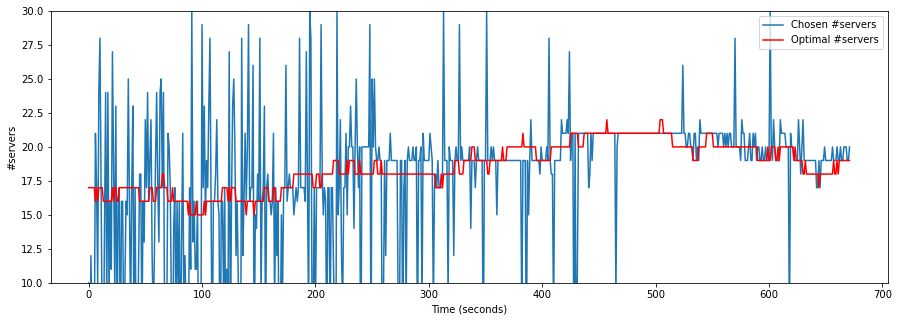

In [16]:
pred = np.array(env.log['numberOfServers'][::2])
real = np.array([getOptServer(_) for _ in env.log['arrivalsPerSecond'][1:-1]])
ged = np.array(env.log['greedyEpsilonActionType'])
print(len(pred), len(real))
plt.figure(figsize=(15,5))
plt.plot(pred, label='Chosen #servers')
plt.plot(real, color='red', label='Optimal #servers')
plt.legend()
plt.ylim(10,30)
plt.xlabel('Time (seconds)')
plt.ylabel('#servers')

#plt.scatter(pred[ged==1],real[ged==1])

In [ ]:
pred = np.array(env.log['numberOfServers'][::2])
real = np.array([getOptServer(_) for _ in env.log['arrivalsPerSecond'][1:-1]])
ged = np.array(env.log['greedyEpsilonActionType'])
print(len(pred), len(real))
plt.figure(figsize=(15,5))
plt.plot(pred, label='Chosen #servers')
plt.plot(real, color='red', label='Optimal #servers')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('#servers')

#plt.scatter(pred[ged==1],real[ged==1])

672 672


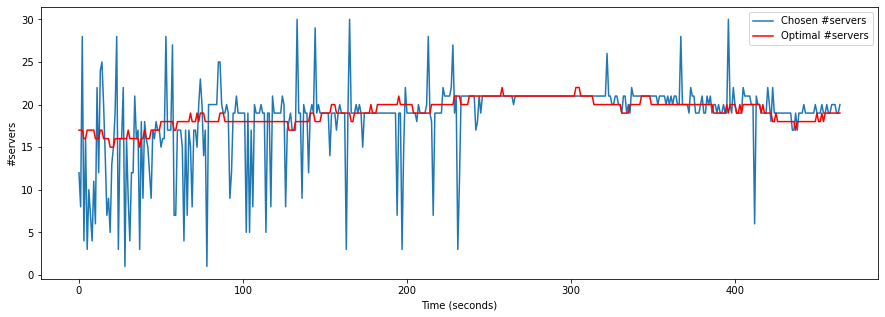

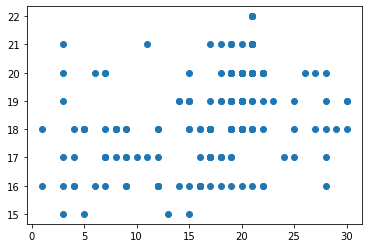

In [17]:
pred = np.array(env.log['numberOfServers'][::2])
real = np.array([getOptServer(_) for _ in env.log['arrivalsPerSecond'][1:-1]])
ged = np.array(env.log['greedyEpsilonActionType'])
print(len(pred), len(real))
plt.figure(figsize=(15,5))
plt.plot(pred[ged==1], label='Chosen #servers')
plt.plot(real[ged==1], color='red', label='Optimal #servers')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('#servers')
plt.figure()
plt.scatter(pred[ged==1],real[ged==1])

In [ ]:
plt.plot(env.log['eta'])
plt.ylabel('$\eta$')
plt.xlabel('Period')

In [ ]:
plt.plot(env.log['eta'])
plt.figure()
plt.plot(env.log['numberOfServers'])
plt.figure()
plt.plot(env.log['greedyEpsilonActionType'])
plt.figure()
plt.plot(env.log['reward'])
plt.figure()
plt.hist(env.logTime['arrivalEvent'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestProcessed'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestCancelled'], bins=int(stopTime/60/60));

In [ ]:
plt.plot(np.array(env.log['reward'])[np.array(env.log['greedyEpsilonActionType'])==1.0])
plt.plot(np.array(env.log['numberOfServers'])[np.array(env.log['greedyEpsilonActionType'])==1.0])

In [ ]:
plt.plot(np.array(env.log['numberOfServers'][::2])[np.array(env.log['greedyEpsilonActionType'])==1.0])

In [ ]:
plt.plot(env.log['arrivalsPerSecond'])

In [ ]:
plt.scatter(loadBalancer.X[:-1,2],loadBalancer.y)
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
plt.scatter(env.log['numberOfServers'][0::2],env.log['reward'])

In [ ]:

def sigmoid(x):
      return 1 / (1 + np.exp(-x))

x = np.arange(0,120,1)
plt.plot(x, sigmoid(2/(0.1*x+2)-0.5))
plt.plot(x, sigmoid(1-0.1*x))

In [ ]:
x = np.arange(0,1000,1)
plt.plot(x, sigmoid(2-0.01*x))